In [1]:
library('tidyverse')

data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-11/colony.csv'

df_bees = read_csv(data_url, col_type = cols()) |>
    mutate(
        season = case_when(
            months == 'October-December' ~ 'winter',
            months == 'January-March' ~ 'winter',
            TRUE ~ 'summer'
        ),
    ) |>
    group_by(year, state, season)

df_bees |> head()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


year months        state       colony_n colony_max colony_lost
1 2015 January-March Alabama        7000     7000      1800     
2 2015 January-March Arizona       35000    35000      4600     
3 2015 January-March Arkansas      13000    14000      1500     
4 2015 January-March California  1440000  1690000    255000     
5 2015 January-March Colorado       3500    12500      1500     
6 2015 January-March Connecticut    3900     3900       870     
  colony_lost_pct colony_added colony_reno colony_reno_pct season
1 26                2800          250       4              winter
2 13                3400         2100       6              winter
3 11                1200           90       1              winter
4 15              250000       124000       7              winter
5 12                 200          140       1              winter
6 22                 290           NA      NA              winter

Warning message:
“Removed 54 rows containing missing values (geom_point).”


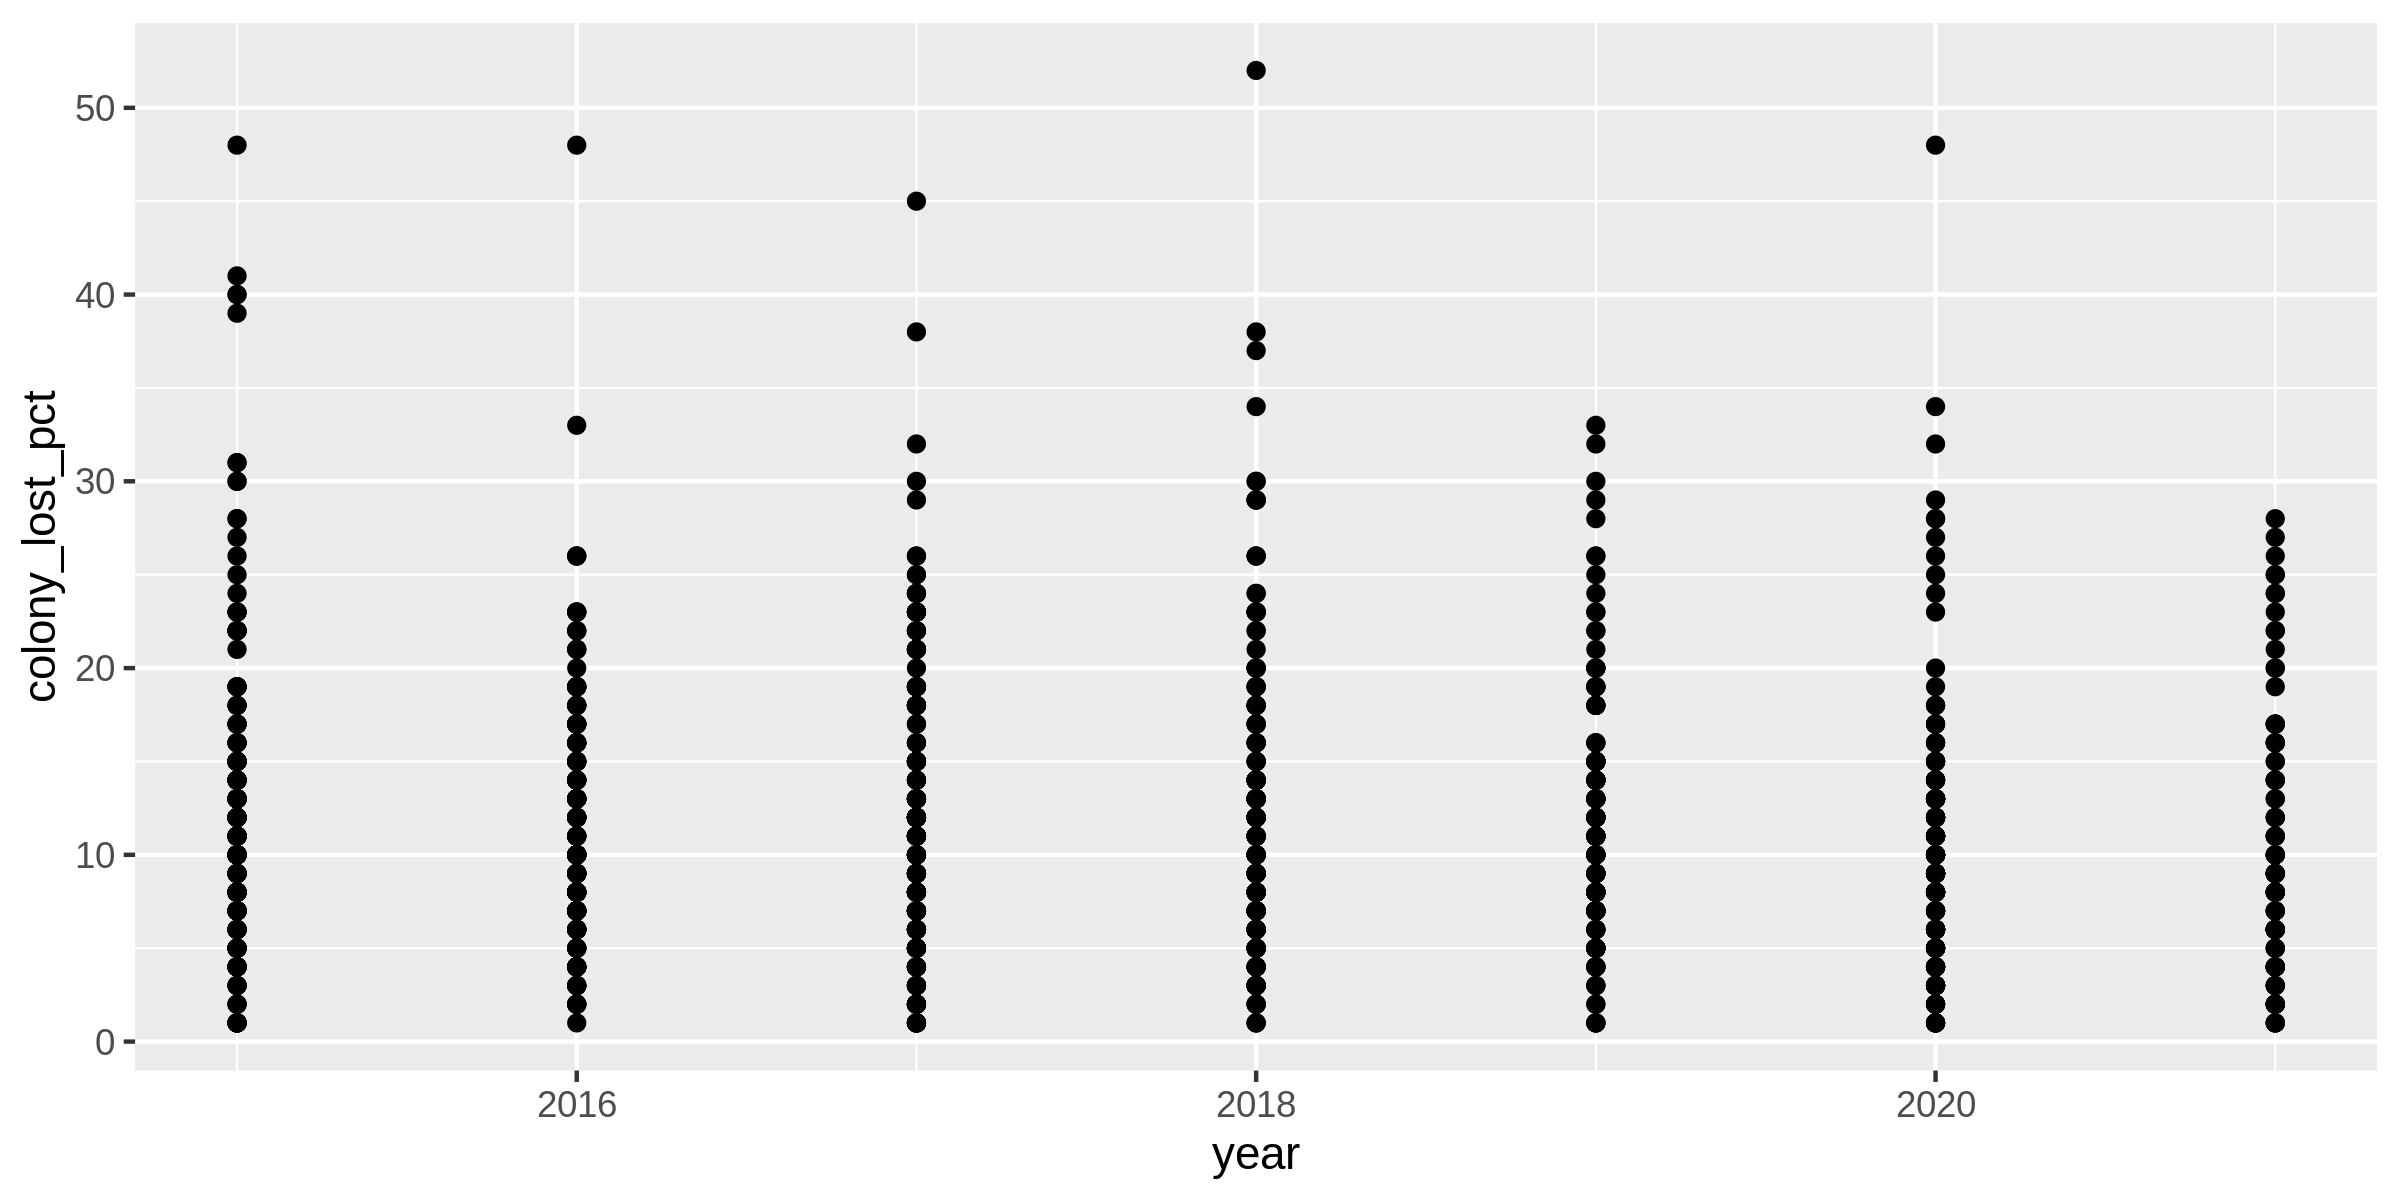

In [4]:
#What if we want to make a bar chart to visualize this data?
options(repr.plot.height = 4, repr.plot.width = 8)
p = ggplot(df_bees, aes(x = year, y = colony_lost_pct)) + geom_point()
p


Warning message:
“Removed 54 rows containing missing values (geom_point).”


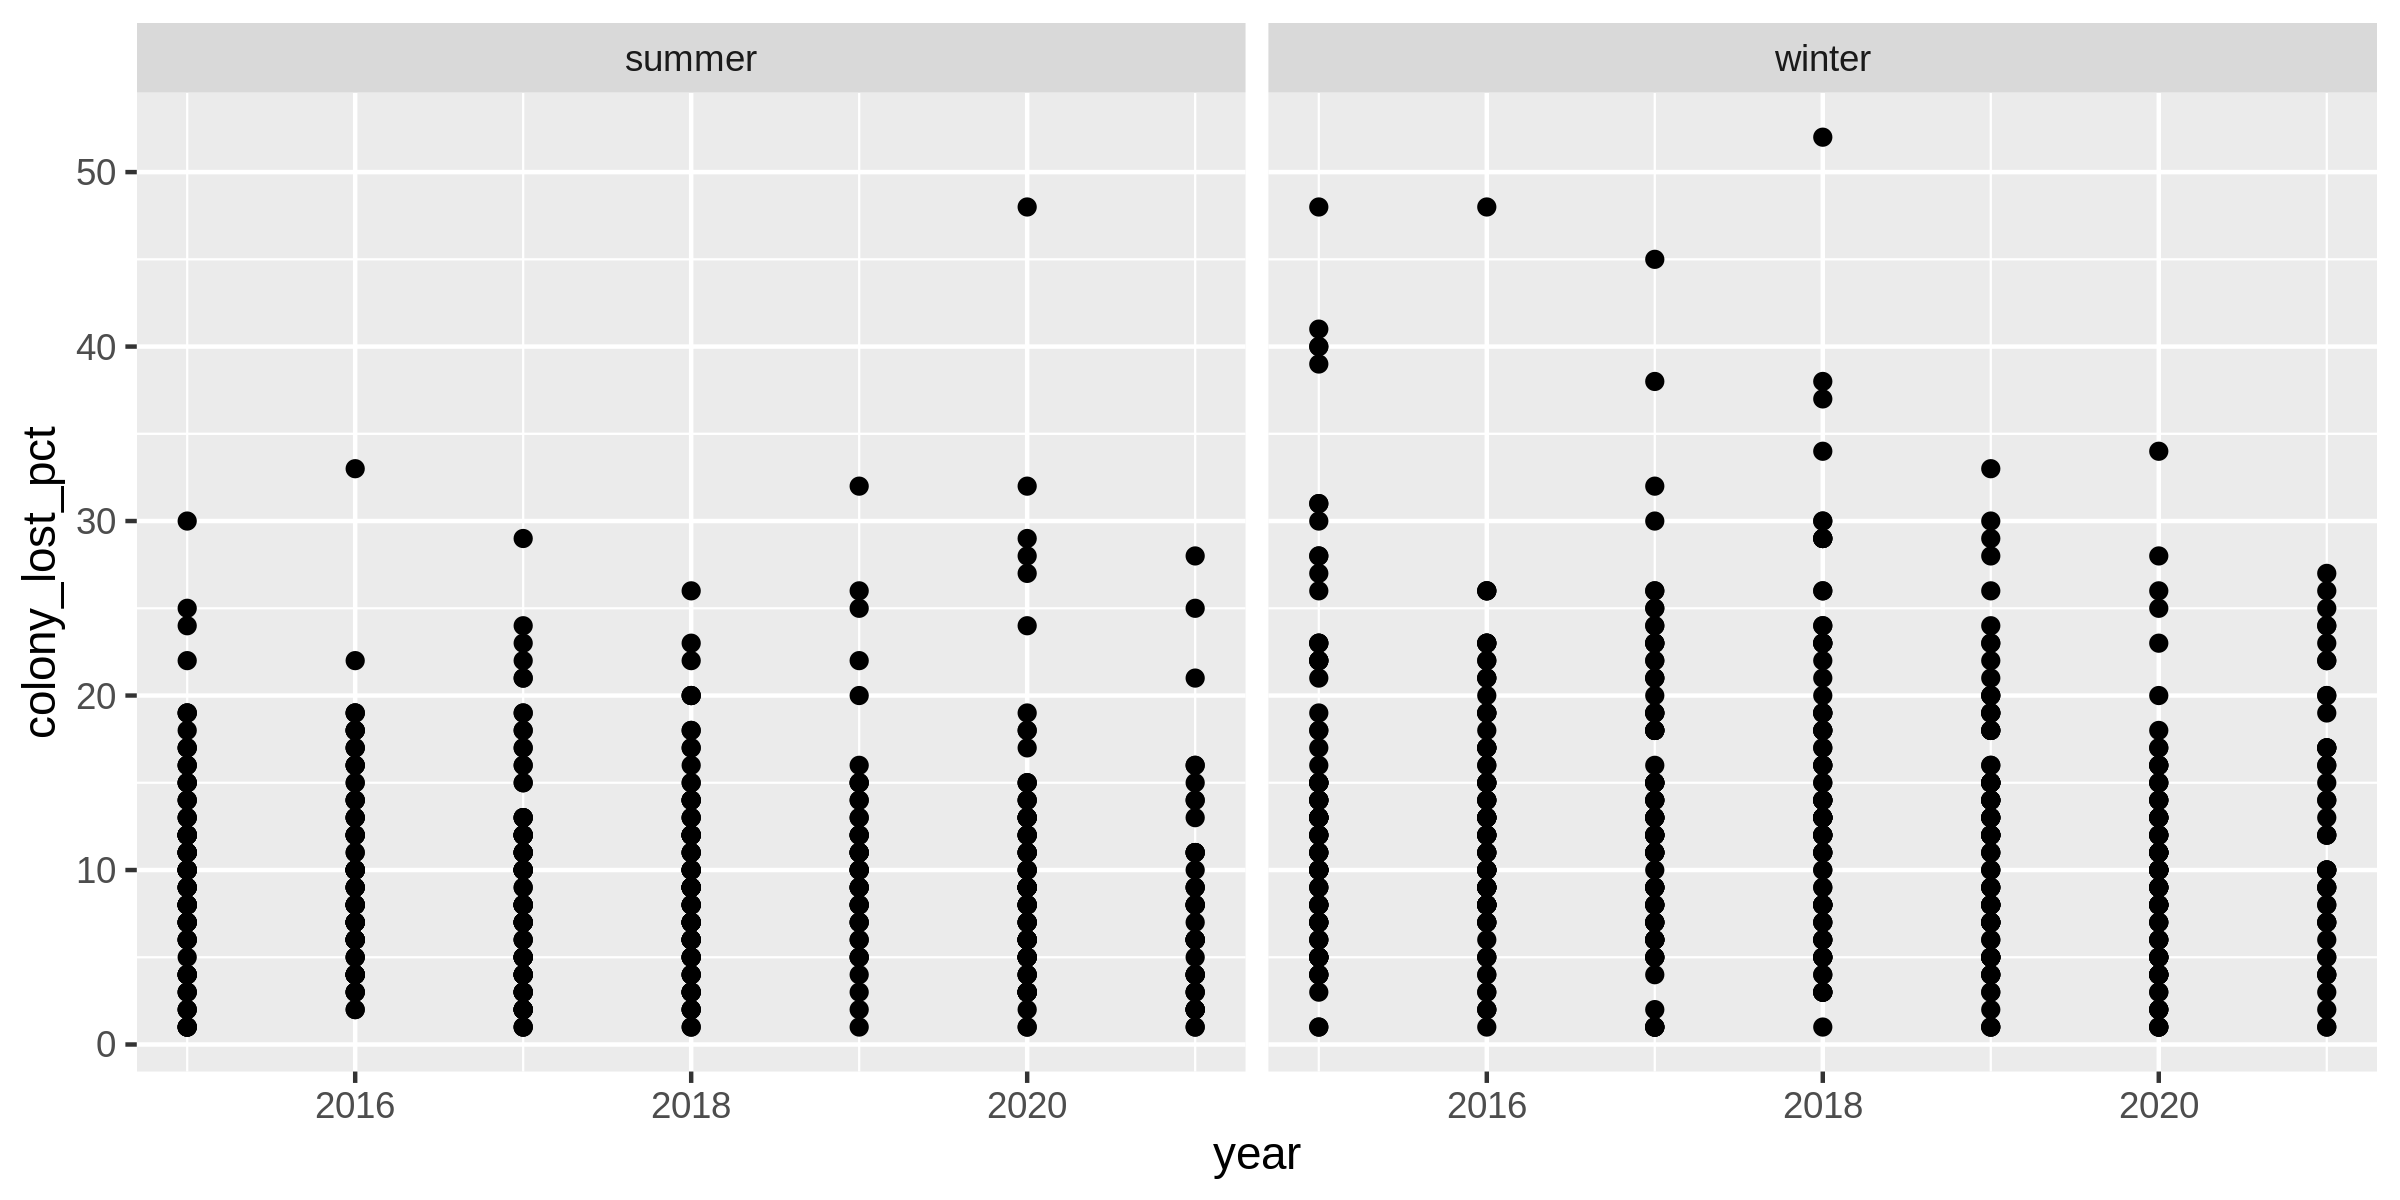

In [6]:
#Alright, that showed us all seasons. We want to facet laterally by season
#p = p + facet_wrap(~season)
# facet wrap is designed so we have to use tilde before we list the column
p

Warning message:
“Removed 54 rows containing missing values (geom_point).”


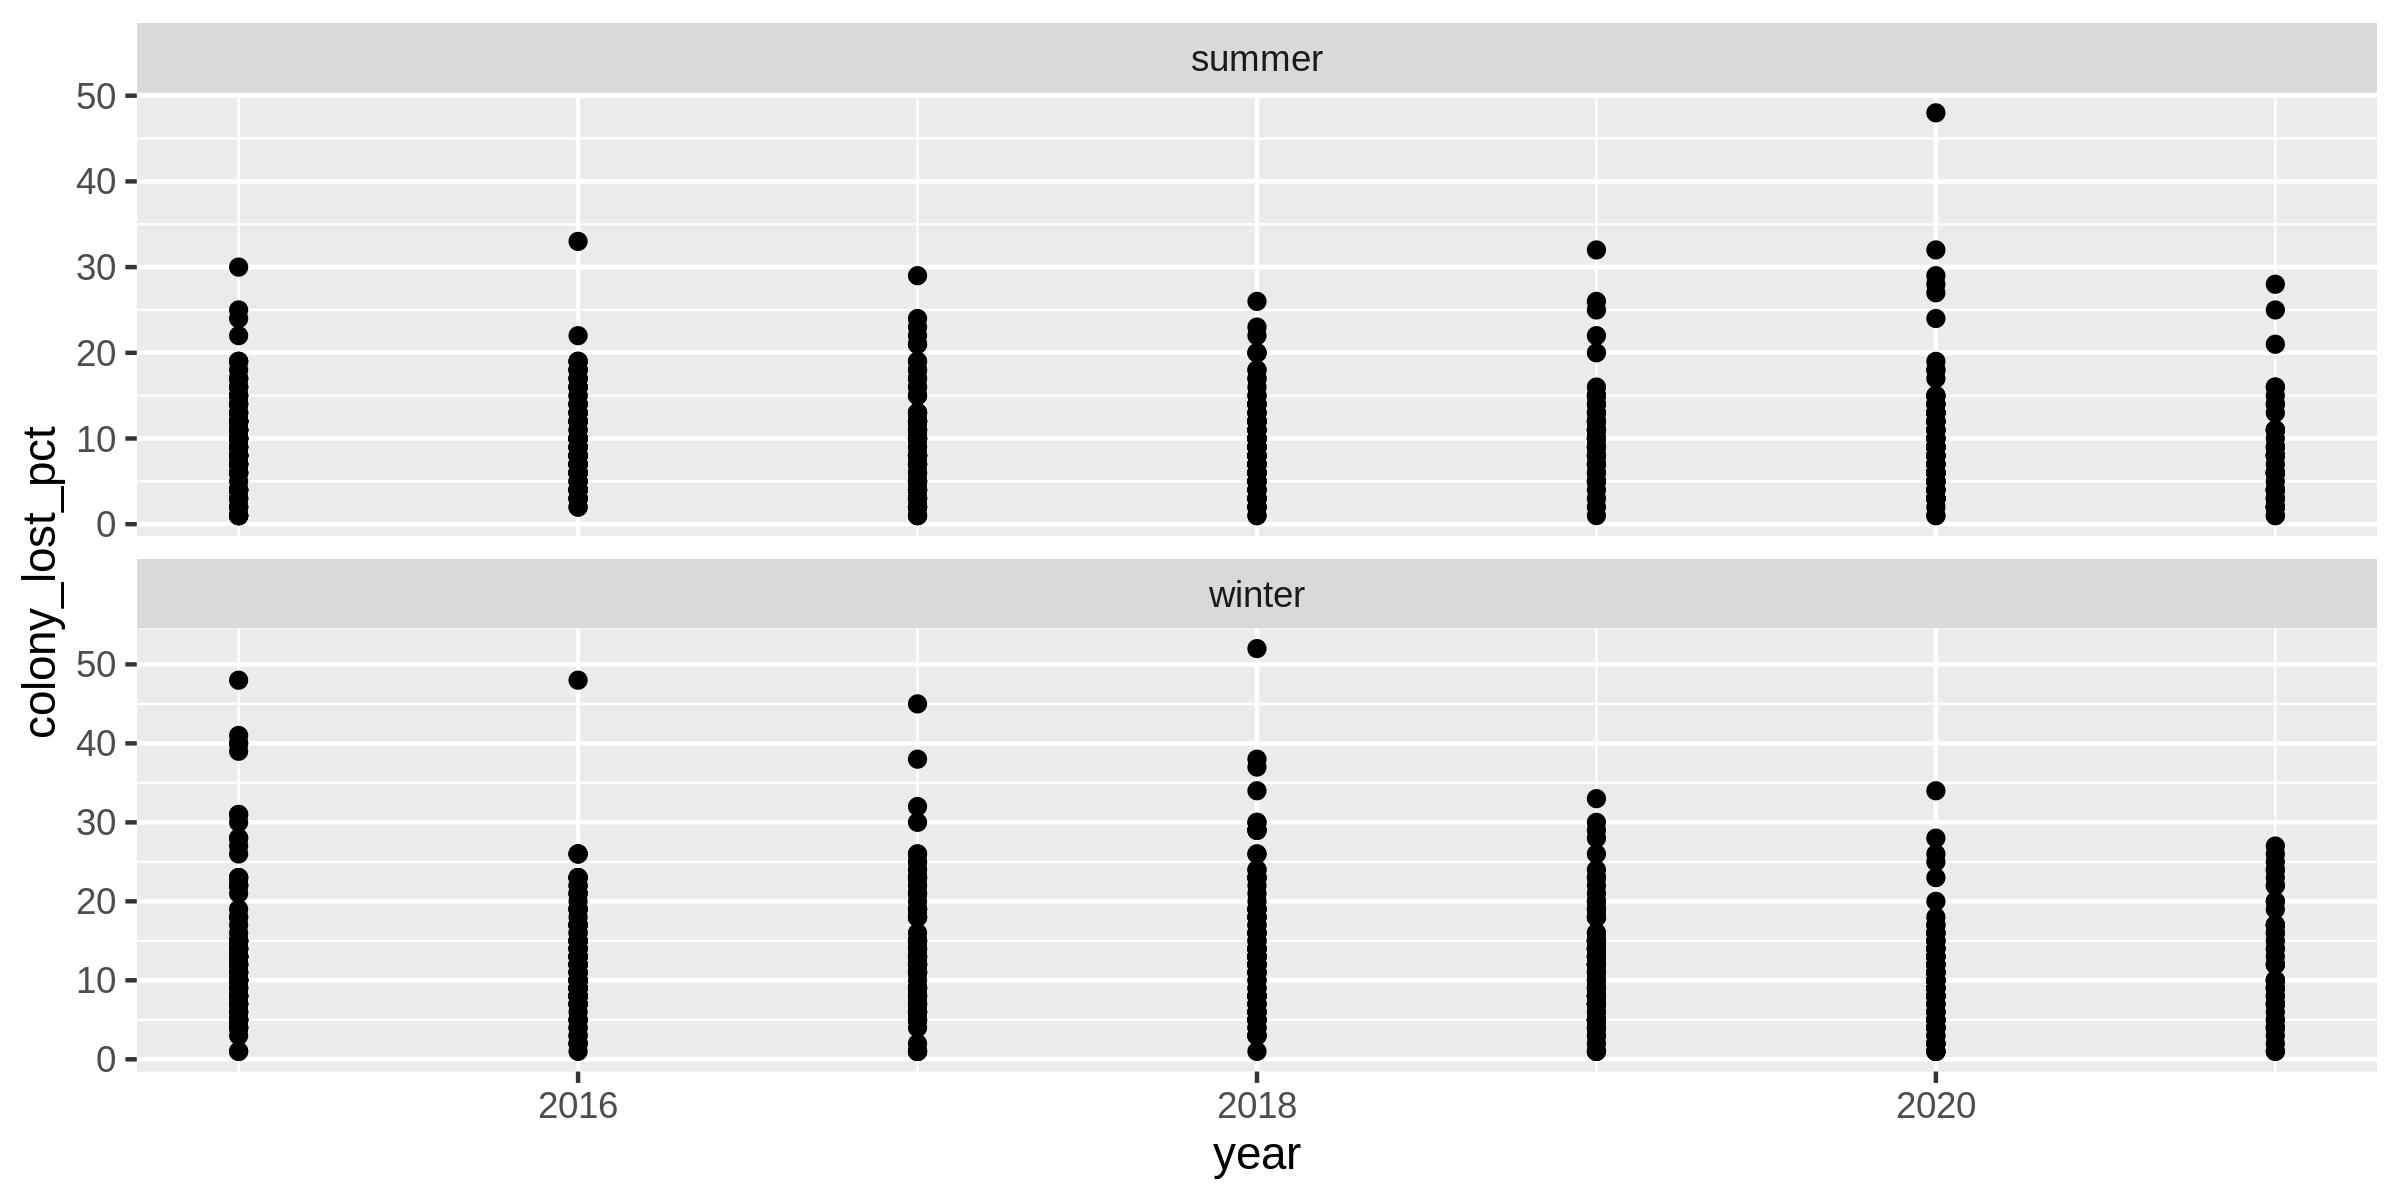

In [12]:
# Now we have the seasons as two different plots. What if we want to plot them as two different rows on the same plot?
#p = p + facet_wrap(~season, ncol=1)
#p
#when we say ncol=1, we transfer the plots from being side-by-side to being stacked
p = p + facet_wrap(~season, ncol=1, scales = 'free_y')
# free_y means that the axis for y (coloy lost %) will be independent / different for each chart based on the data
p

Warning message:
“Removed 54 rows containing missing values (geom_point).”


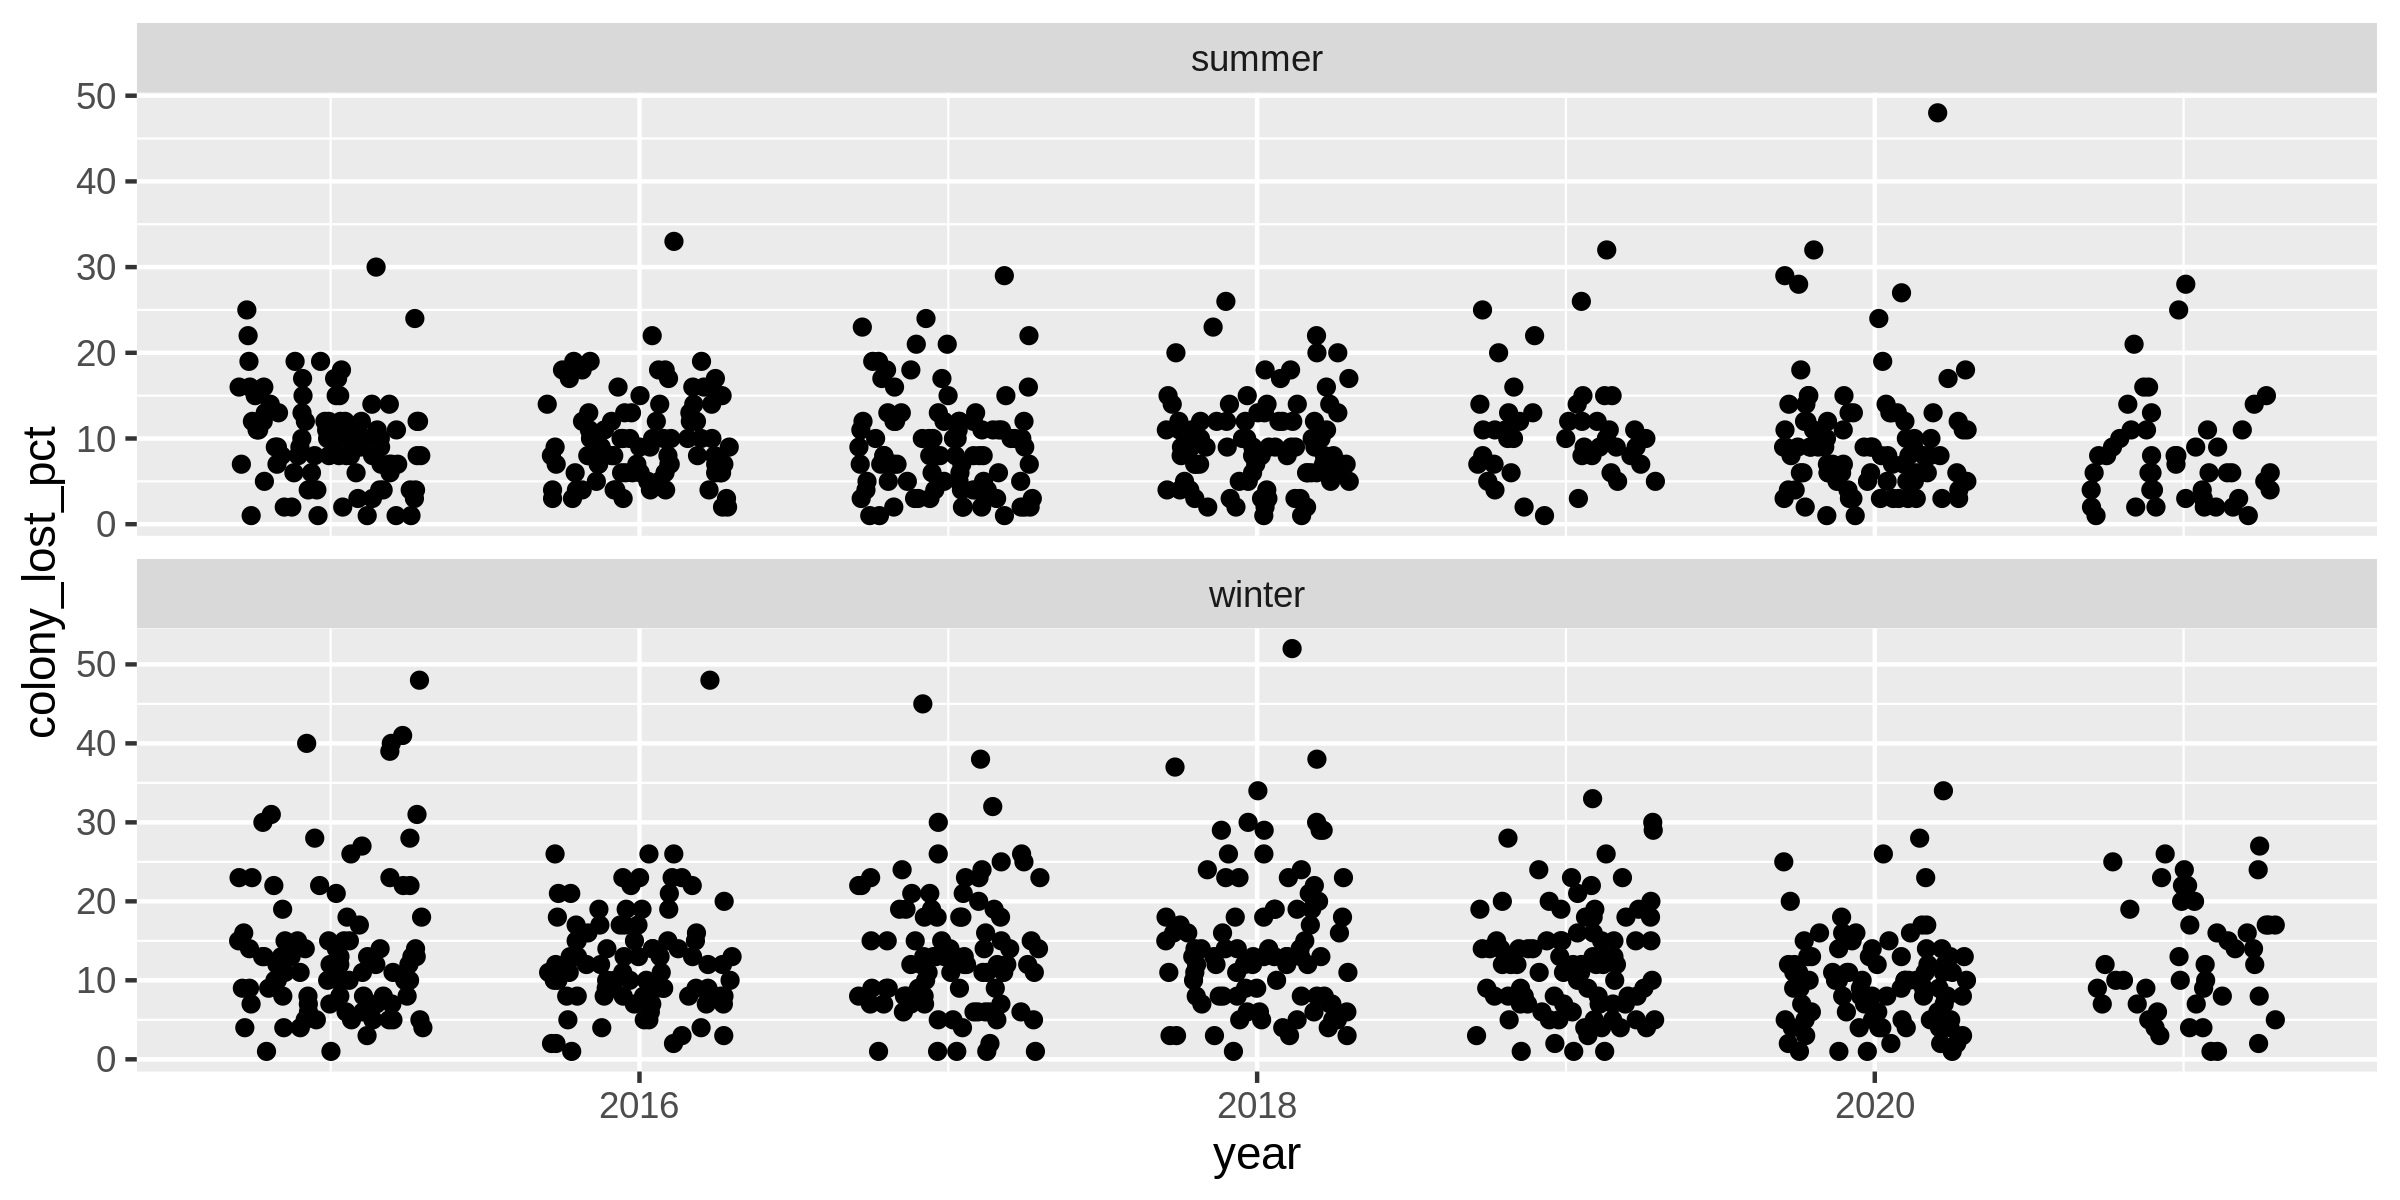

In [14]:
# Now we have the seasons as two different plots. What if we want to plot them as two different rows on the same plot?
#p = p + facet_wrap(~season, ncol=1)
#p
#when we say ncol=1, we transfer the plots from being side-by-side to being stacked
#p = p + facet_wrap(~season, ncol=1, scales = 'free_y')
# free_y means that the axis for y (coloy lost %) will be independent / different for each chart based on the data
#p
#now need to make it so points aren't overlapping, we do this by adjusting the jitter of the points
p = ggplot(df_bees, aes(x = year, y = colony_lost_pct)) + 
    geom_point(position = position_jitter(height=0, width=0.3))
#we add the jitter function to geom_point, tells us to move pts 0.3 units in width direction
p = p + facet_wrap(~season, ncol=1, scales = 'free_y')
#we can do this for x direction, y direction, or both
p

Warning message:
“Removed 54 rows containing missing values (geom_point).”


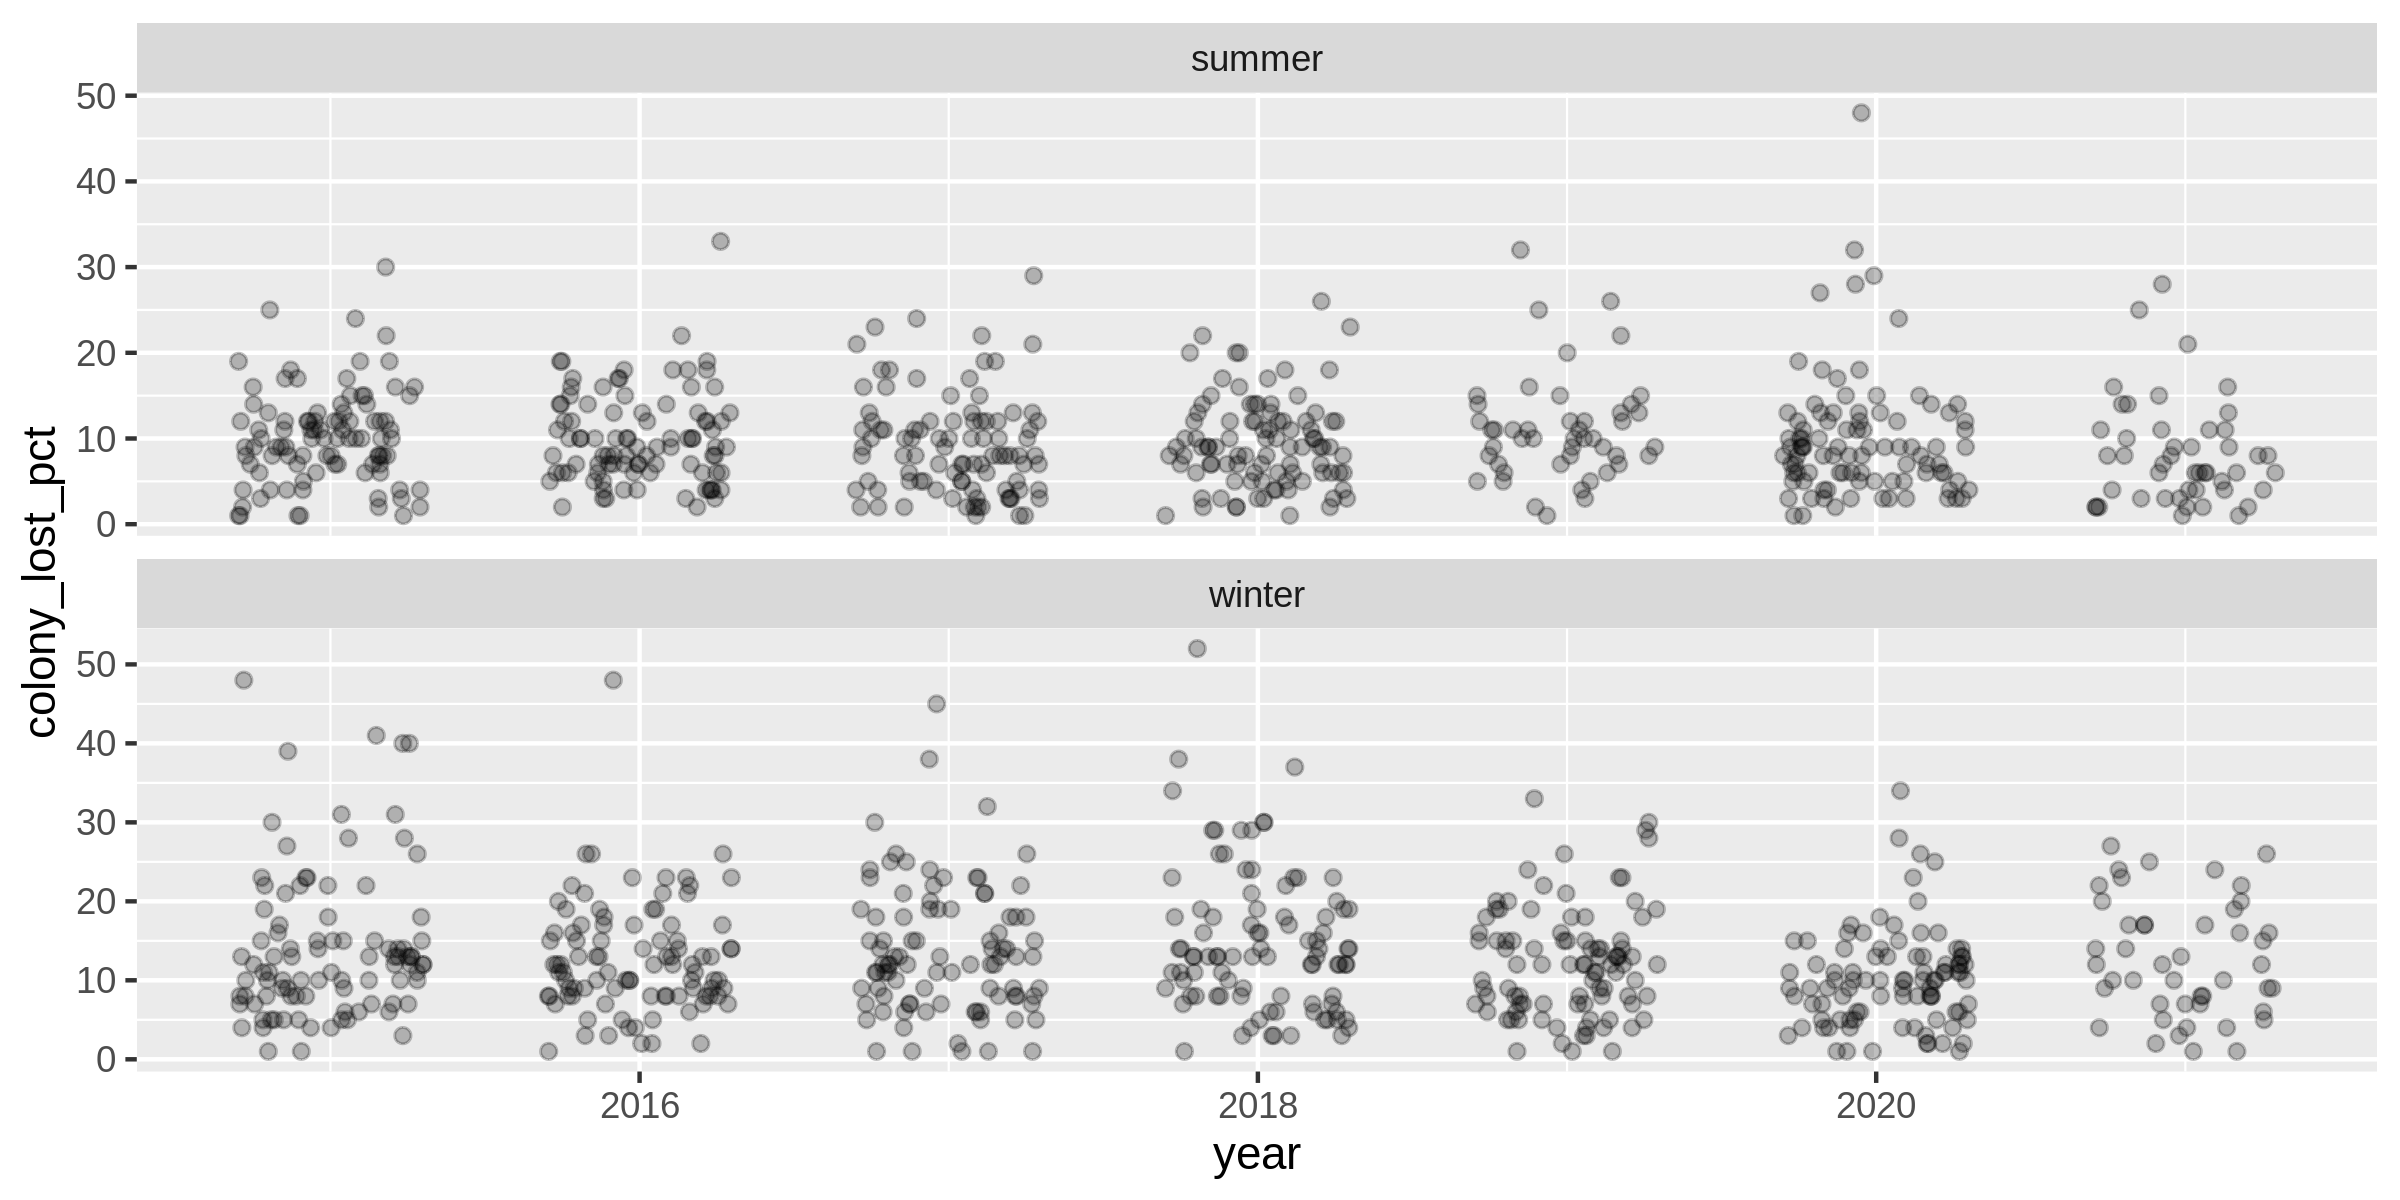

In [16]:
options(repr.plot.height = 4, repr.plot.width = 8)
#no points are hidden now! But we can do something else to improve this chart
#we can make the points somewhat transparent by setting alpha argument (takes vals from 0 to 1)
# 0 is fully transparent, 1 is opaque
p = ggplot(df_bees, aes(x = year, y = colony_lost_pct)) + 
    geom_point(position = position_jitter(height=0, width=0.3), alpha = 0.25)
p = p + facet_wrap(~season, ncol=1, scales = 'free_y')
p